In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_AUCs_and_errors(df, sample_type_pattern, luminosities):
    AUCs, AUC_errors = [], []
    for L in luminosities:
        sample_type = sample_type_pattern.format(L)
        AUC = df[df['Sample Type'] == sample_type]['AUC-true']
        AUCs.append(AUC.mean())
        AUC_errors.append(AUC.std())
    return AUCs, AUC_errors

def offset_errorbar(ax, x, y, yerr, offset, color, **kwargs):
    x = np.array(x)
    ax.plot(x, y, label='mean', color=color)
    ax.errorbar(x * offset, y, yerr=yerr, label='error', **kwargs)

def plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color, offset=0.1, **kwargs):
    AUCs, AUC_errors = [], []
    for L in luminosities:
        sample_type = sample_type_pattern.format(L)
        AUC = df[df['Sample Type'] == sample_type]['AUC-true']
        AUCs.append(AUC.mean())
        AUC_errors.append(AUC.std())
    # ax.errorbar(luminosities, AUCs, yerr=AUC_errors, fmt='o-', label=label)
    
    offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=offset, color=color, **kwargs)

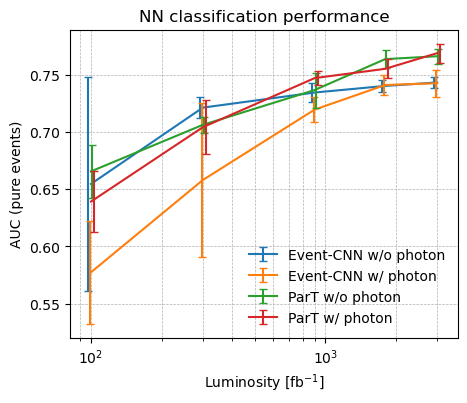

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './CNN/GGF_VBF_CWoLa_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-07-31' and time < '2025-08-01'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, remove photon: case 1'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C0', offset=0.97, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C1', offset=0.99, linestyle='', capsize=3)


file_name = './Particle_transformer/GGF_VBF_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-09-16' and time < '2025-09-17 07'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/o photon, pT normalization'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C2', offset=1.01, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/ photon, pT normalization'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C3', offset=1.03, linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('NN classification performance')
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Event-CNN w/o photon', 'Event-CNN w/ photon', 'ParT w/o photon', 'ParT w/ photon']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/NN_AUC-true_L.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# Data augmentation

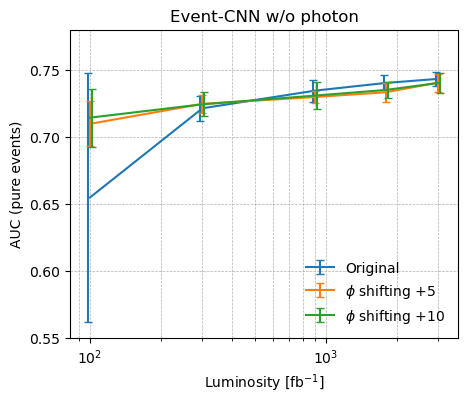

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './CNN/GGF_VBF_CWoLa_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-07-31' and time < '2025-08-01'")
sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, remove photon: case 1'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C0', offset=0.98, linestyle='', capsize=3)


file_name = './CNN/GGF_VBF_CWoLa_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-09-22' and time < '2025-09-24'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, remove photon: case 1, phi shifting: +5'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C1', offset=1.0, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, remove photon: case 1, phi shifting: +10'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C2', offset=1.02, linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Event-CNN w/o photon')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/Event-CNN_wo_photon_AUC-true_L-phi_aug.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

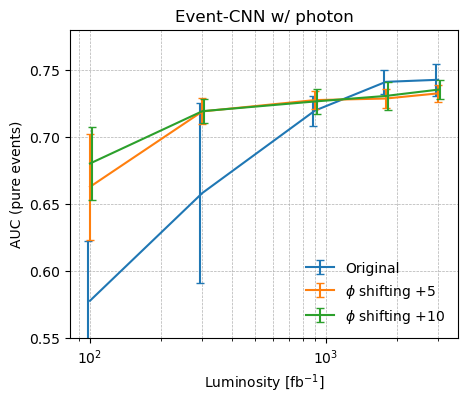

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './CNN/GGF_VBF_CWoLa_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-07-31' and time < '2025-08-01'")
sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C0', offset=0.98, linestyle='', capsize=3)


file_name = './CNN/GGF_VBF_CWoLa_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-09-22' and time < '2025-09-24'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, phi shifting: +5'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C1', offset=1.0, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, pT normalized, phi shifting: +10'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C2', offset=1.02, linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Event-CNN w/ photon')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/Event-CNN_w_photon_AUC-true_L-phi_aug.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

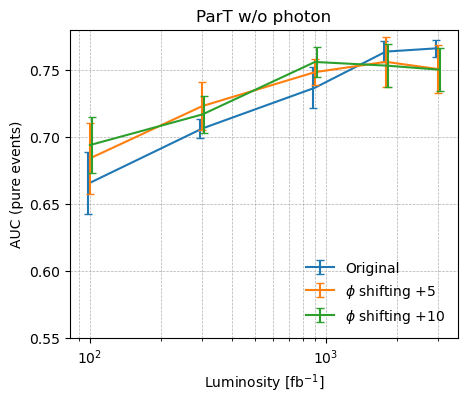

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './Particle_transformer/GGF_VBF_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-09-16' and time < '2025-09-17 07'")
sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/o photon, pT normalization'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C0', offset=0.98, linestyle='', capsize=3)


df = pd.read_csv(file_name)
df = df.query("time > '2025-09-29' and time < '2025-10-05'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/o photon, phi shifting: +5'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C1', offset=1.0, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/o photon, phi shifting: +10'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C2', offset=1.02, linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('ParT w/o photon')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/ParT_wo_photon_AUC-true_L-phi_aug.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

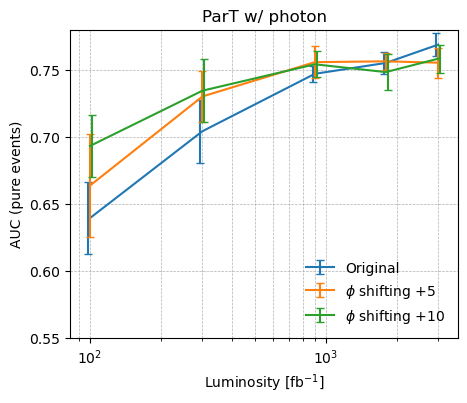

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './Particle_transformer/GGF_VBF_training_results.csv'
df = pd.read_csv(file_name)
df = df.query("time > '2025-09-16' and time < '2025-09-17 07'")
sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/ photon, pT normalization'
luminosities = [100, 300, 900, 1800, 3000]
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C0', offset=0.98, linestyle='', capsize=3)


df = pd.read_csv(file_name)
df = df.query("time > '2025-09-29' and time < '2025-10-05'")

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/ photon, phi shifting: +5'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C1', offset=1.0, linestyle='', capsize=3)

sample_type_pattern = 'quark jet: = 2, L: {} fb^-1, w/ photon, phi shifting: +10'
plot_luminosity_vs_AUC(ax, df, sample_type_pattern, luminosities, color='C2', offset=1.02, linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('ParT w/ photon')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/ParT_w_photon_AUC-true_L-phi_aug.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# Apply di-photon on ZZ4l

In [8]:
file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

In [9]:
def get_AUCs_and_errors(df, model_name_pattern, luminosities):
    AUCs, AUC_errors = [], []
    for L in luminosities:
        model_name = model_name_pattern.format(L)
        AUC = df[df['Model Name'].str.contains(model_name)]['ZZ->4l AUC']
        AUCs.append(AUC.mean())
        AUC_errors.append(AUC.std())
    return AUCs, AUC_errors

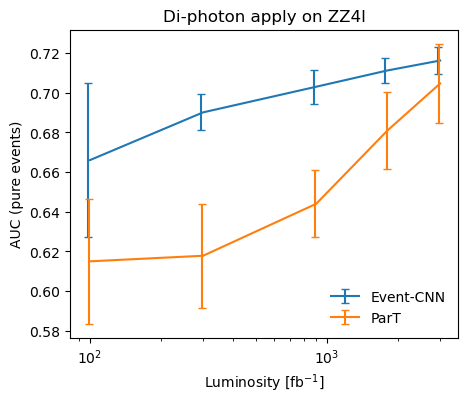

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C0', linestyle='', capsize=3)


model_name_pattern = 'ParT_L{}_wo_a_pTnorm'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.99, color='C1', linestyle='', capsize=3)


ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Di-photon apply on ZZ4l')

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Event-CNN', 'ParT']

ax.legend(handles, labels, frameon=False, loc='lower right')

# plt.savefig('../figures/ParT_AUC-true_L-pTnorm_logit.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

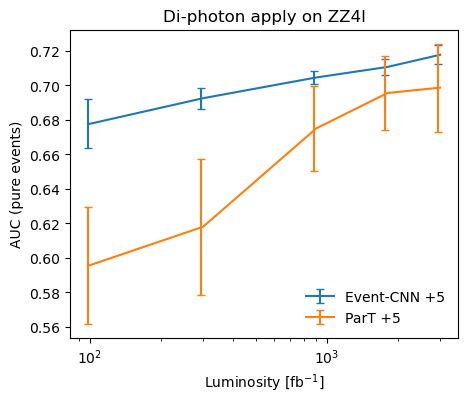

In [11]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1_phi_aug_5'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C0', linestyle='', capsize=3)


model_name_pattern = 'ParT_L{}_wo_a_phi_aug_5'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C1', linestyle='', capsize=3)


ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Di-photon apply on ZZ4l')

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Event-CNN +5', 'ParT +5']

ax.legend(handles, labels, frameon=False, loc='lower right')

# plt.savefig('../figures/ParT_AUC-true_L-pTnorm_logit.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

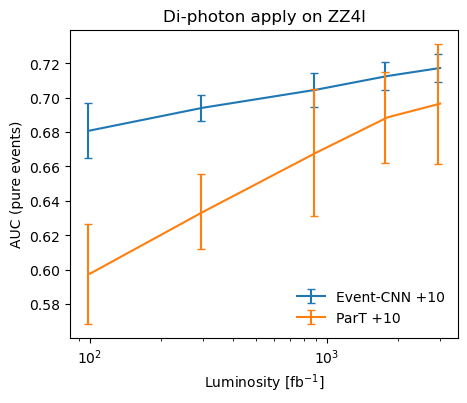

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1_phi_aug_10'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C0', linestyle='', capsize=3)


model_name_pattern = 'ParT_L{}_wo_a_phi_aug_10'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C1', linestyle='', capsize=3)


ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Di-photon apply on ZZ4l')

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Event-CNN +10', 'ParT +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

# plt.savefig('../figures/ParT_AUC-true_L-pTnorm_logit.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

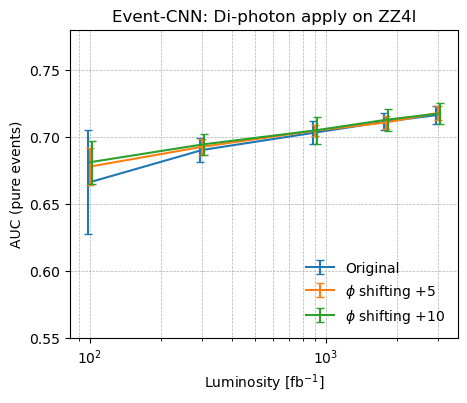

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C0', linestyle='', capsize=3)


model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1_phi_aug_5'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=1.0, color='C1', linestyle='', capsize=3)

model_name_pattern = 'quark_jet_2_cut_eventCNN_L_{}_wo_a_case1_phi_aug_10'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=1.02, color='C2', linestyle='', capsize=3)


ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('Event-CNN: Di-photon apply on ZZ4l')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/EventCNN_aa_apply_to_ZZ4l_AUC-true_L.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

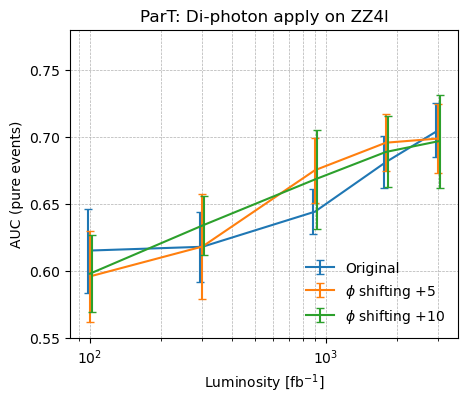

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))

file_name = './GGF_VBF_CWoLa_summary.csv'
df = pd.read_csv(file_name)

model_name_pattern = 'ParT_L{}_wo_a_pTnorm'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=0.98, color='C0', linestyle='', capsize=3)

model_name_pattern = 'ParT_L{}_wo_a_phi_aug_5'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=1.0, color='C1', linestyle='', capsize=3)

model_name_pattern = 'ParT_L{}_wo_a_phi_aug_10'
luminosities = [100, 300, 900, 1800, 3000]
AUCs, AUC_errors = get_AUCs_and_errors(df, model_name_pattern, luminosities)
offset_errorbar(ax, luminosities, AUCs, AUC_errors, offset=1.02, color='C2', linestyle='', capsize=3)


ax.set_xscale('log')
ax.set_xlabel('Luminosity [fb$^{-1}$]')
ax.set_ylabel('AUC (pure events)')
ax.set_title('ParT: Di-photon apply on ZZ4l')
ax.set_ylim(0.55, 0.78)
ax.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
handles = [(handles[i], handles[i+n]) for i in range(n)]
labels = ['Original', '$\phi$ shifting +5', '$\phi$ shifting +10']

ax.legend(handles, labels, frameon=False, loc='lower right')

plt.savefig('./figures/ParT_aa_apply_to_ZZ4l_AUC-true_L.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()